In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv", header = 0)
test = pd.read_csv("test.csv", header = 0)
labels = train.SalePrice

In [3]:
train_temp = train["SalePrice"].copy()

In [4]:
train.drop(["Id", "SalePrice"], axis=1, inplace=True)
test.drop(["Id"], axis=1, inplace=True)

In [5]:
print("{0:15}\t{1}\t{2}".format("Name", "NaNs", "#unique"))
for col in train.columns:
    print("{0:15}\t{1:.4f}\t{2}".format(col, train[col].isnull().mean(), train[col].nunique()))

Name           	NaNs	#unique
MSSubClass     	0.0000	15
MSZoning       	0.0000	5
LotFrontage    	0.1774	110
LotArea        	0.0000	1073
Street         	0.0000	2
Alley          	0.9377	2
LotShape       	0.0000	4
LandContour    	0.0000	4
Utilities      	0.0000	2
LotConfig      	0.0000	5
LandSlope      	0.0000	3
Neighborhood   	0.0000	25
Condition1     	0.0000	9
Condition2     	0.0000	8
BldgType       	0.0000	5
HouseStyle     	0.0000	8
OverallQual    	0.0000	10
OverallCond    	0.0000	9
YearBuilt      	0.0000	112
YearRemodAdd   	0.0000	61
RoofStyle      	0.0000	6
RoofMatl       	0.0000	8
Exterior1st    	0.0000	15
Exterior2nd    	0.0000	16
MasVnrType     	0.0055	4
MasVnrArea     	0.0055	327
ExterQual      	0.0000	4
ExterCond      	0.0000	5
Foundation     	0.0000	6
BsmtQual       	0.0253	4
BsmtCond       	0.0253	4
BsmtExposure   	0.0260	4
BsmtFinType1   	0.0253	6
BsmtFinSF1     	0.0000	637
BsmtFinType2   	0.0260	6
BsmtFinSF2     	0.0000	144
BsmtUnfSF      	0.0000	780
TotalBsmtSF    	0.0000	72

Здесь представлены, как количественные (площадь участка, кол-во комнат, площадь этажей и т.п.), так и качественные (класс здания, год постройки, форма участка, материал крыши и т.п.) признаки. Также можем выделить набор признаков для описания гаража, набор для описания подвала, для жилой части здания и т.п.

In [6]:
all = pd.concat([train, test], axis=0)

In [7]:
to_drop = ["Street","Utilities","MiscFeature"]
all.drop(to_drop, axis=1, inplace=True, errors="ignore")

to_replace_to_none = ["Fence", "FireplaceQu", "Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1"
                     ,"BsmtFinType2","Electrical","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC"]
for col in to_replace_to_none:
    all[col].fillna("No" + col, inplace=True)
    
#to_replace_to_zero = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF","TotalBsmtSF","BsmtHalfBath"
#                     ,"MasVnrArea","GarageArea","BsmtFullBath"]
#for col in to_replace_to_zero:
#    all[col].fillna(0, inplace=True)
    
#to_replace_to_avg = ["LotFrontage"]
#for col in to_replace_to_avg:
#    all[col].fillna(all[col].mean(), inplace=True)
    
all["KitchenQual"].fillna("TA", inplace=True)
    
all.fillna(0, inplace=True)

In [8]:
def binarize(data, columns):
    """
    binarize feature
    
    data: pd.csv dataset
    columns: list of cstegorical columns to process
    """
    binarized_data = data.copy()
    for column in columns:
        unique_items = set(data[column])
        for unique_item in unique_items:
            new_column = []
            for item in data[column]:
                new_column.append(int(item==unique_item))
            binarized_data[column+'_'+str(unique_item)] = new_column
        binarized_data.drop(column, axis=1, inplace=True)
    return binarized_data

In [9]:
all[['LotArea', 'LotFrontage', 'YearBuilt']].describe()

,LotArea,LotFrontage,YearBuilt
count,2919.000000,2919.000000,2919.000000
mean,10168.114080,57.766701,1971.312778
std,7886.996359,33.481636,30.291442
min,1300.000000,0.000000,1872.000000
25%,7478.000000,43.000000,1953.500000
50%,9453.000000,63.000000,1973.000000
75%,11570.000000,78.000000,2001.000000
max,215245.000000,313.000000,2010.000000


In [10]:
all = binarize(all, ["LandContour","LotConfig","LotShape","LandSlope","Neighborhood","BldgType","HouseStyle", "ExterQual"
                     ,"CentralAir", "SaleCondition", "PavedDrive", "KitchenQual"
                    ])

In [11]:
categorial = ["Condition1", "Condition2", "FireplaceQu","Exterior1st", "Exterior2nd", "RoofMatl","Alley"
              , "MasVnrType","ExterCond","RoofStyle", "Electrical", "Heating","SaleType", "HeatingQC"
                  , "Foundation", "BsmtQual", "BsmtCond", "BsmtFinType1", "BsmtFinType2","MSZoning"
                   , "Functional", "GarageFinish", "BsmtExposure","GarageType", "Fence"
                    , "GarageQual", "GarageCond"]
for col in categorial:
    all[col] = all[col].factorize()[0]

to_drop = ['GarageArea', 'GarageYrBlt', "PoolQC", "MSSubClass","MoSold"
          , "Electrical", "Heating", "Functional", "FireplaceQu"
          ,"SaleType","ScreenPorch","YearRemodAdd","BsmtFullBath","BsmtHalfBath"
          ,"BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","LowQualFinSF"
          , "GarageCond", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"
          #,"BsmtHalfBath"
          ]
all = all.drop(to_drop, axis=1)

In [12]:
to_drop = ['GarageArea', 'GarageYrBlt', "PoolQC", "MSSubClass", "MoSold"]
all = all.drop(to_drop, axis=1)

In [13]:
buck = ["YearBuilt"#,"GrLivArea","TotalBsmtSF"        ,"LotArea","LotFrontage"
       ]
coef = [[1850,1940,1960,1980,1990,2000,2005,2100],
        #[100,500,1000,1500,2000,10000],
       # [100,500,1000,1500,10000],
        #[1000,3000,5000,7000,9000,11000,13000,15000,17000,20000,20000000],
       # [20,50,100,10000]
       ]

In [14]:
for x in range(len(buck)):
    bucketed = np.array(all[buck[x]])
    for y in range(len(coef[x])-1):
        bucketed[(bucketed >= coef[x][y]) & (bucketed < coef[x][y+1])] = coef[x][y]
    all[buck[x]] = bucketed

In [15]:
to_flat = ["TotRmsAbvGrd","HalfBath","BedroomAbvGr","GarageCars","PoolArea"]#,"YearBuilt","GrLivArea","LotArea","LotFrontage"]
    #,"BsmtFullBath","BsmtHalfBath"]
coef = [10,1,4,3,100]#,2015,2500,20000,100]
for x in range(len(to_flat)):
    flatten = np.array(all[to_flat[x]]) 
    flatten[flatten >= coef[x]] = coef[x]
    all[to_flat[x]] = flatten

e = pd.Series(train_temp)
train_temp = all.iloc[:train.shape[0]].astype('float').assign(e=e.values)
corr_matrix1 = train_temp.corr().abs()
upper1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
upper1["e"]

s1 = upper1["SalePrice"]
all = all.drop(s1[s1<0.05].index, axis=1)

In [16]:
corr_matrix = all.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [17]:
train = all.iloc[:train.shape[0]].astype('float')
test = all.iloc[train.shape[0]:].astype('float')

Linear Regression

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [19]:
def submit(preds):
    submission = pd.read_csv("sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)

In [20]:
regr = LinearRegression(normalize=True, n_jobs=1)
regr.fit(train, np.log1p(labels))
preds = regr.predict(test)
submit(np.expm1(preds))

In [21]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-5.01191443e-04 -4.55952435e-03 -1.39911834e-04  1.32301391e-06
  1.25043021e-02 -7.25780820e-03 -2.93064806e-02  5.79582891e-02
  3.59452408e-02  6.14152332e-04  7.42852353e-04  2.70675239e-02
 -4.04411685e-02  1.23810101e-03 -2.05863593e-03 -2.64145098e-03
 -3.45774962e-05 -1.40227125e-02 -1.41606173e-02  3.35105447e-03
 -9.14613880e-03  1.59701067e-03 -5.52362157e-03 -3.75414201e+08
 -3.57335967e-03 -3.75414201e+08 -3.75414201e+08  3.75414201e+08
 -1.24373703e-02 -1.27175292e-02  6.85307379e-03 -8.55876493e+08
 -8.55876493e+08 -8.55876493e+08  8.55876493e+08  4.52804318e-02
  1.95565227e-02  4.82616508e-02  3.72123761e-02  5.62884236e-03
 -7.30122853e-02  1.30790783e-02 -2.37362349e-02  1.58547570e-02
  7.99423168e-03 -1.07716621e-02  2.57474733e-03  5.89673820e-02
  6.11044292e-03 -4.66595957e-04  1.19369287e-04  8.18530944e-05
  1.30096629e-04  1.99977236e-04  3.28651423e-04 -1.30924561e-03
 -5.51146679e-03  1.49852581e-06 -8.75527016e-04 -4.18175358e-03
  1.08875

In [22]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=7, random_state=0)

In [23]:
from sklearn.model_selection import cross_val_score
t = cross_val_score(regr, train, np.log1p(labels), scoring="mean_squared_error", cv=cv).mean()

C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlc

In [24]:
print(int(100000*t))

-2075


Лучший результат на Kaggle для линейной регрессии - 0.13106
https://www.kaggle.com/pavelkuleshov

DecisionTreeRegressor

In [30]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [31]:
regr_1 = DecisionTreeRegressor(max_depth=3, random_state=10)
regr_2 = DecisionTreeRegressor(max_depth=5, random_state=10)
regr_1.fit(train, np.log1p(labels))
regr_2.fit(train, np.log1p(labels))

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=10, splitter='best')

In [32]:
print(cross_val_score(regr_1, train, np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())
print(cross_val_score(regr_2, train, np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

-0.051188214611993466
-0.03905210738007333


C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlc

In [33]:
preds = regr_2.predict(test)
submit(np.expm1(preds))

RandomForest

In [34]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100)

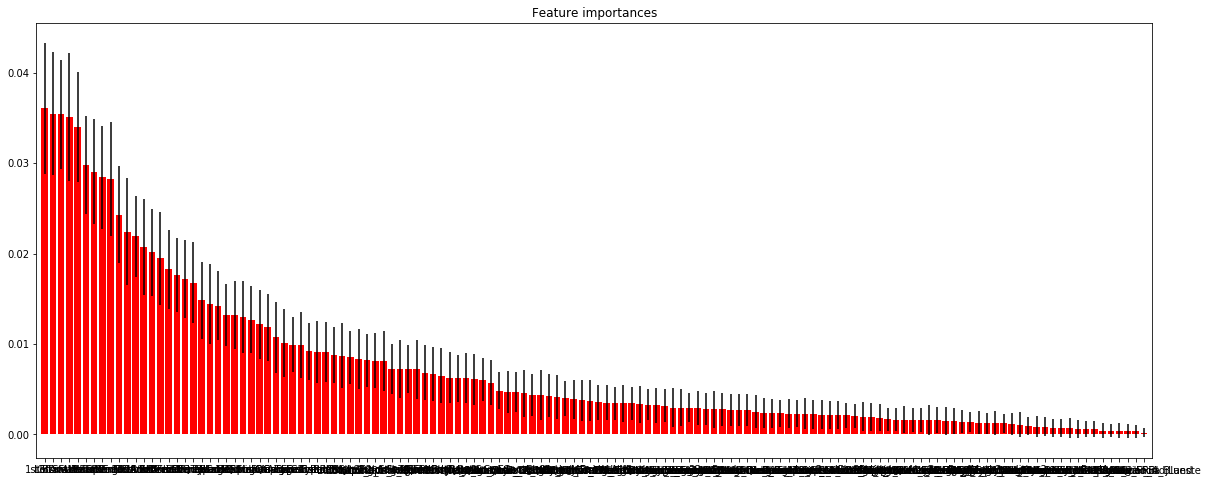

In [35]:
rf.fit(train, labels)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train.shape[1]), train.columns[indices])
plt.xlim([-1, train.shape[1]])
plt.show()

In [36]:
for feature in zip(train.columns, rf.feature_importances_):
    print(feature)

('MSSubClass', 0.012666004614191418)
('MSZoning', 0.006802600355692548)
('LotFrontage', 0.02907306083439044)
('LotArea', 0.03550595688524815)
('Alley', 0.0034288169124601507)
('Condition1', 0.008108533680658905)
('Condition2', 0.001064516330431057)
('OverallQual', 0.017625129679920234)
('OverallCond', 0.014844577632145946)
('YearBuilt', 0.014241536463941966)
('YearRemodAdd', 0.02827274844246532)
('RoofStyle', 0.008803184448240109)
('RoofMatl', 0.001330824414154204)
('Exterior1st', 0.016788928625994355)
('Exterior2nd', 0.018250993357704373)
('MasVnrType', 0.011866917481371449)
('MasVnrArea', 0.02071943917017767)
('ExterCond', 0.006039352225188793)
('Foundation', 0.008348431233539512)
('BsmtQual', 0.009100757061763593)
('BsmtCond', 0.006104441356388118)
('BsmtExposure', 0.013198655545832017)
('BsmtFinType1', 0.0172194871094779)
('BsmtFinSF1', 0.028432978698200214)
('BsmtFinType2', 0.006502057578775894)
('BsmtFinSF2', 0.008681134831852722)
('BsmtUnfSF', 0.03510606921609279)
('TotalBsmtSF'

In [ ]:
rr = np.array(train.columns)
rrr = np.stack((rf.feature_importances_,rr), axis=-1)
rrr = np.sort(rrr, axis=0,)

In [ ]:
dr = []
for i in range(50):
    dr.append(rrr[len(rrr)-1-i,1])

In [ ]:
train = train[dr]
test = test[dr]

In [37]:
from sklearn.grid_search import GridSearchCV

rf = RandomForestClassifier(n_estimators=100, bootstrap=True)
params = {
    'n_estimators': [50, 100, 500]
}
gsv = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=3, verbose=1)
gsv.fit(train, labels)

C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), W

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   37.4s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [38]:
print(gsv.best_params_, gsv.best_score_)

{'n_estimators': 500} 0.01643835616438356


In [39]:
preds = gsv.predict(test)
submit(preds)

In [40]:
gsv.score(train,labels)

1.0

In [ ]:
cross_val_score(gsv, train, labels, scoring='accuracy')

GradientBoostingRegressor

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [26]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(train, labels)
print(cross_val_score(clf, train, np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ManaUlc

-0.017162387485369125


C:\Users\ManaUlcho\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [27]:
preds = clf.predict(test)
submit(preds)

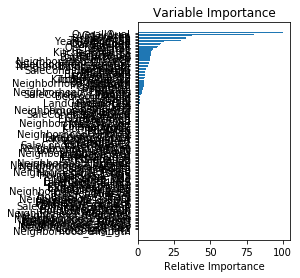

In [28]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [29]:
rr = np.array(train.columns[sorted_idx])

In [ ]:
dr = []
for i in range(50):
    dr.append(rr[len(rr)-1-i])

In [ ]:
train = train[dr]
test = test[dr]